# 0. Instalacion de utilitarios Pyspark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [ ]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 59kB/s 
     |████████████████████████████████| 204kB 57.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=0a3e4993ff02aad852b7c0cc8e3ec28291a35342a28fb35a91bd1b8d9837bd5a
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [ ]:
# Lectura desde un archivo fisico
from google.colab import files
uploaded = files.upload()

In [ ]:

# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
ls

drive/        spark-2.3.4-bin-hadoop2.7/     spark-2.4.4-bin-hadoop2.7/
sample_data/  spark-2.3.4-bin-hadoop2.7.tgz  spark-2.4.4-bin-hadoop2.7.tgz


#2.  Cargando los datos en formato Spark

In [ ]:
DS_peliculas_rating = spark.read.csv(
    '/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/7_Recomendacion_Peliculas/Recomendacion_peliculas.csv', 
    sep=',', 
    header=True, 
    inferSchema=True
)

# 2.1 Revision de formatos 
DS_peliculas_rating.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)



In [ ]:
# Dimensiona de base
print((DS_peliculas_rating.count(), len(DS_peliculas_rating.columns)))

(100000, 3)


In [ ]:
# 2.2 Revisiones  
DS_peliculas_rating.show(5)

+------+------------+------+
|userId|       title|rating|
+------+------------+------+
|   196|Kolya (1996)|     3|
|    63|Kolya (1996)|     3|
|   226|Kolya (1996)|     5|
|   154|Kolya (1996)|     3|
|   306|Kolya (1996)|     5|
+------+------------+------+
only showing top 5 rows



In [ ]:
# 2.3 Validacion de carga del total de registros
print(DS_peliculas_rating.count())

100000


In [ ]:
# 2.4 Exploracion inicial
DS_peliculas_rating.describe().show()

+-------+------------------+--------------------+------------------+
|summary|            userId|               title|            rating|
+-------+------------------+--------------------+------------------+
|  count|            100000|              100000|            100000|
|   mean|         462.48475|                null|           3.52986|
| stddev|266.61442012750865|                null|1.1256735991443156|
|    min|                 1|'Til There Was Yo...|                 1|
|    max|               943|             unknown|                 5|
+-------+------------------+--------------------+------------------+



In [ ]:
# 2.5 Los clientes que más vistaron la plataforma de videos
DS_peliculas_rating.groupBy('userId').count().orderBy('count', ascending=False).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|405   |737  |
|655   |685  |
|13    |636  |
|450   |540  |
|276   |518  |
|416   |493  |
|537   |490  |
|303   |484  |
|234   |480  |
|393   |448  |
+------+-----+
only showing top 10 rows



In [ ]:
# 2.6  Las clientes que menos vieron las peliculas
DS_peliculas_rating.groupBy('userId').count().orderBy('count', ascending=True).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|732   |20   |
|631   |20   |
|572   |20   |
|926   |20   |
|93    |20   |
|596   |20   |
|636   |20   |
|34    |20   |
|300   |20   |
|685   |20   |
+------+-----+
only showing top 10 rows



In [ ]:
# 2.7  Las peliculas con mayor numero de visualizaciones
DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=False).show(10,False)

+-----------------------------+-----+
|title                        |count|
+-----------------------------+-----+
|Star Wars (1977)             |583  |
|Contact (1997)               |509  |
|Fargo (1996)                 |508  |
|Return of the Jedi (1983)    |507  |
|Liar Liar (1997)             |485  |
|English Patient, The (1996)  |481  |
|Scream (1996)                |478  |
|Toy Story (1995)             |452  |
|Air Force One (1997)         |431  |
|Independence Day (ID4) (1996)|429  |
+-----------------------------+-----+
only showing top 10 rows



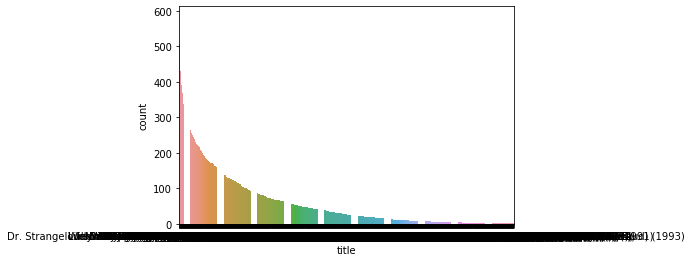

In [ ]:
#Graficas
res= DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=False)
red = res.toPandas()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.barplot(x="title", y="count", data=red)



In [ ]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('title').count().orderBy('count', ascending=True).show(10,False)

+------------------------------------------+-----+
|title                                     |count|
+------------------------------------------+-----+
|Tigrero: A Film That Was Never Made (1994)|1    |
|Leopard Son, The (1996)                   |1    |
|Aiqing wansui (1994)                      |1    |
|Fear, The (1995)                          |1    |
|Mad Dog Time (1996)                       |1    |
|Target (1995)                             |1    |
|Lashou shentan (1992)                     |1    |
|Vie est belle, La (Life is Rosey) (1987)  |1    |
|Modern Affair, A (1995)                   |1    |
|Next Step, The (1995)                     |1    |
+------------------------------------------+-----+
only showing top 10 rows



In [ ]:
# El cliente 100 y el 450 cold celd
DS_peliculas_rating.filter(
    (DS_peliculas_rating['title'] == 'Star Wars (1977)') & (DS_peliculas_rating['userId']=='450')
).show()

+------+----------------+------+
|userId|           title|rating|
+------+----------------+------+
|   450|Star Wars (1977)|     5|
+------+----------------+------+



# 3. FEature Engineering: Tansforma pelicula a numero



In [ ]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer, IndexToString

In [ ]:
# Configurando la Numerzación los titulos de las peliculas
# title_new = La codificación de las peliculas

stringIndexer = StringIndexer(inputCol="title", outputCol="title_new")

In [ ]:
DS_peliculas_rating.show(10)

+------+------------+------+
|userId|       title|rating|
+------+------------+------+
|   196|Kolya (1996)|     3|
|    63|Kolya (1996)|     3|
|   226|Kolya (1996)|     5|
|   154|Kolya (1996)|     3|
|   306|Kolya (1996)|     5|
|   296|Kolya (1996)|     4|
|    34|Kolya (1996)|     5|
|   271|Kolya (1996)|     4|
|   201|Kolya (1996)|     4|
|   209|Kolya (1996)|     4|
+------+------------+------+
only showing top 10 rows



In [ ]:
#Aplicando la numerización de peliculas
model = stringIndexer.fit(DS_peliculas_rating)

In [ ]:
#Creando un nuevo Dataframe con el indexado creado
indexed = model.transform(DS_peliculas_rating)

In [ ]:
#Revision de los indices
indexed.show(10)

+------+------------+------+---------+
|userId|       title|rating|title_new|
+------+------------+------+---------+
|   196|Kolya (1996)|     3|    287.0|
|    63|Kolya (1996)|     3|    287.0|
|   226|Kolya (1996)|     5|    287.0|
|   154|Kolya (1996)|     3|    287.0|
|   306|Kolya (1996)|     5|    287.0|
|   296|Kolya (1996)|     4|    287.0|
|    34|Kolya (1996)|     5|    287.0|
|   271|Kolya (1996)|     4|    287.0|
|   201|Kolya (1996)|     4|    287.0|
|   209|Kolya (1996)|     4|    287.0|
+------+------------+------+---------+
only showing top 10 rows



In [ ]:
#Numero de veces que cada titulo ha aparecido
indexed.groupBy('title_new').count().orderBy('count',ascending=False).show(10, False)

+---------+-----+
|title_new|count|
+---------+-----+
|0.0      |583  |
|1.0      |509  |
|2.0      |508  |
|3.0      |507  |
|4.0      |485  |
|5.0      |481  |
|6.0      |478  |
|7.0      |452  |
|8.0      |431  |
|9.0      |429  |
+---------+-----+
only showing top 10 rows



# 4. Dividiendo la data en muestra de entrenamiento y validacion


In [ ]:
help(indexed.randomSplit)

Help on method randomSplit in module pyspark.sql.dataframe:

randomSplit(weights, seed=None) method of pyspark.sql.dataframe.DataFrame instance
    Randomly splits this :class:`DataFrame` with the provided weights.
    
    :param weights: list of doubles as weights with which to split the DataFrame. Weights will
        be normalized if they don't sum up to 1.0.
    :param seed: The seed for sampling.
    
    >>> splits = df4.randomSplit([1.0, 2.0], 24)
    >>> splits[0].count()
    1
    
    >>> splits[1].count()
    3
    
    .. versionadded:: 1.4



In [ ]:
#4.1  Data de entrenamiento y validacion
train, test = indexed.randomSplit([0.75, 0.25], seed=42)

In [ ]:
# Nro de entrenamiento
train.count()

75031

In [ ]:
train.show(5)

+------+--------------------+------+---------+
|userId|               title|rating|title_new|
+------+--------------------+------+---------+
|     1|101 Dalmatians (1...|     2|    308.0|
|     1|   Abyss, The (1989)|     3|    200.0|
|     1|Ace Ventura: Pet ...|     3|    322.0|
|     1|      Air Bud (1997)|     1|    673.0|
|     1|        Akira (1988)|     4|    596.0|
+------+--------------------+------+---------+
only showing top 5 rows



In [ ]:
# Nro de Validacion
test.count()

24969

In [ ]:
test.show(5)

+------+--------------------+------+---------+
|userId|               title|rating|title_new|
+------+--------------------+------+---------+
|     1| 12 Angry Men (1957)|     5|    263.0|
|     1|20,000 Leagues Un...|     3|    454.0|
|     1|2001: A Space Ody...|     4|     60.0|
|     1|Angels and Insect...|     4|    451.0|
|     1|    Apollo 13 (1995)|     4|     51.0|
+------+--------------------+------+---------+
only showing top 5 rows



# 5. Entrenando el Modelo


In [ ]:
#Importando el modelo Recomendador ALS
from pyspark.sql.functions import *
from pyspark.ml.recommendation import ALS


In [ ]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec = ALS(
    maxIter=10,
    regParam=0.01,
    userCol='userId',
    itemCol='title_new',
    ratingCol='rating',
    nonnegative=True,
    coldStartStrategy="drop",
    implicitPrefs=False
)

# maxIter: El maximo de iteraciones
# regParam: Parametro de REgularización
# nonnegative: Especificar si se utiliza una restriccion negativa en los Minimos cuadrados
# coldStartStrategy: Parametro que elimina cualquier cliente que no tenga informacion
# implicitPrefs: Si es implicito hace referencia a feedback no registrado voluntariamente por el cliente

In [ ]:
#Entrenando el modelo
rec_model = rec.fit(train)

In [ ]:
#Haciendo las predicciones en la data de test 
predicted_ratings = rec_model.transform(test)

In [ ]:
#Revisando los pronostico
predicted_ratings.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- title_new: double (nullable = false)
 |-- prediction: float (nullable = false)



In [ ]:
# Revision rapida de los pronosticos
predicted_ratings.orderBy(rand()).show(10)

+------+--------------------+------+---------+----------+
|userId|               title|rating|title_new|prediction|
+------+--------------------+------+---------+----------+
|   655|2 Days in the Val...|     3|    355.0| 2.5921433|
|   504|Corrina, Corrina ...|     3|    715.0|  3.392963|
|   174|Wizard of Oz, The...|     2|     70.0| 3.6322527|
|   331|Microcosmos: Le p...|     3|    870.0| 6.7176294|
|   234|Madame Butterfly ...|     3|   1227.0| 3.1087177|
|   239|Fly Away Home (1996)|     1|    141.0| 2.7272744|
|   863|     In & Out (1997)|     4|     83.0| 3.6742563|
|   708|      Flipper (1996)|     1|    922.0| 1.9472231|
|   749| Program, The (1993)|     3|    786.0| 3.4875898|
|   398|Fish Called Wanda...|     4|     69.0| 3.8754458|
+------+--------------------+------+---------+----------+
only showing top 10 rows



In [ ]:
# Generando los top 10 peliculas sugeridas por cada cliente
userRecs = rec_model.recommendForAllUsers(10)

In [ ]:
userRecs.show(5, False)

+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|userId|recommendations                                                                                                                                                                        |
+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|471   |[[930, 16.846155], [1121, 16.534775], [919, 15.584093], [869, 15.214818], [996, 15.114396], [1239, 15.011452], [1066, 14.84825], [883, 14.658953], [1074, 14.627299], [923, 14.356593]]|
|463   |[[804, 6.46665], [1049, 6.292797], [998, 6.0285635], [1022, 5.773181], [1068, 5.7446985], [1301, 5.743225], [1393, 5.63342], [1432, 5.6177406], [914, 5.5527067], [1268, 5.548155]]    |
|833   |[[1277, 6.735337], [1058, 5

# 5. Evaluación del poder predictivo del modelo


In [ ]:
# Creando la columna diferencia del pronostico
predicted_ratings_witherr = predicted_ratings.withColumn(
    'err', abs(predicted_ratings.prediction - predicted_ratings.rating)
)

predicted_ratings_witherr.show()

+------+--------------------+------+---------+----------+-----------+
|userId|               title|rating|title_new|prediction|        err|
+------+--------------------+------+---------+----------+-----------+
|   463|That Thing You Do...|     3|    148.0| 2.6229181| 0.37708187|
|   251|That Thing You Do...|     4|    148.0| 3.5145473| 0.48545265|
|   296|That Thing You Do...|     5|    148.0| 3.4161263|  1.5838737|
|   642|That Thing You Do...|     5|    148.0| 3.5182166|  1.4817834|
|   101|That Thing You Do...|     3|    148.0| 3.2064214| 0.20642138|
|    26|That Thing You Do...|     3|    148.0| 3.0854294| 0.08542943|
|   501|That Thing You Do...|     3|    148.0| 3.4328532| 0.43285322|
|   336|That Thing You Do...|     1|    148.0| 4.0463634|  3.0463634|
|   330|That Thing You Do...|     5|    148.0| 3.9899979|  1.0100021|
|   360|That Thing You Do...|     3|    148.0| 3.4100723| 0.41007233|
|   599|That Thing You Do...|     5|    148.0| 3.8680613|  1.1319387|
|   416|That Thing Y

In [ ]:
# Distribución de las valoraciones
predicted_ratings.groupBy('rating').count().orderBy('rating', ascending=True).show()

+------+-----+
|rating|count|
+------+-----+
|     1| 1563|
|     2| 2819|
|     3| 6757|
|     4| 8556|
|     5| 5229|
+------+-----+



In [ ]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating').agg({'err':'mean'}).orderBy('rating',ascending=True).show()

+------+------------------+
|rating|          avg(err)|
+------+------------------+
|     1|1.5675447746149322|
|     2|1.0571452738674543|
|     3|0.6332736125610845|
|     4|0.5604539595671505|
|     5|0.9443126513694396|
+------+------------------+



In [ ]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating').agg({'err':'std'}).orderBy('rating',ascending=True).show()

+------+-------------------+
|rating|        stddev(err)|
+------+-------------------+
|     1| 0.9906212843930412|
|     2|  0.701535097704724|
|     3|0.48325731604175864|
|     4| 0.4778440945038258|
|     5| 0.6408675130952619|
+------+-------------------+



In [ ]:
#Importando el evaluador de Regresion RMSE 
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
#Evluando la presición del pronostico
evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating')

In [ ]:
#Evluando el error de pronostico global
rmse=evaluator.evaluate(predicted_ratings)

In [ ]:
#Imprimiento el error
print(rmse)

1.0126361863850386


# 6. Recomendandor de peliculas, ya listo!

In [ ]:
#Listado de peliculas unicas
unique_movies=indexed.select('title_new').distinct()

In [ ]:
#Total de peliculas
unique_movies.count()

1664

In [ ]:
#Asignando un alias {a} la lista unica de peliculas
a = unique_movies.alias('a')

In [ ]:
# Eligiendo un cliente
user_id=100

# Creando una tabla que contiene una pelicula por usuario
watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new').distinct()

#Numero de peliculas ya evaluadas 
watched_movies.count()

59

In [ ]:
# Asignando un alias  {b} ha peliculas que el usuario ya vio de la tabla
b=watched_movies.alias('b')

In [ ]:
#Cruzando ambas tablas
total_movies = a.join(b, a.title_new == b.title_new,how='left')

In [ ]:
total_movies.show(10,False)

+---------+---------+
|title_new|title_new|
+---------+---------+
|558.0    |null     |
|305.0    |null     |
|299.0    |null     |
|596.0    |null     |
|769.0    |null     |
|934.0    |null     |
|496.0    |null     |
|1051.0   |null     |
|692.0    |null     |
|810.0    |null     |
+---------+---------+
only showing top 10 rows



In [ ]:
# Seleccionando peliculas que el cliente aun no ha mirado
remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()

In [ ]:
remaining_movies.show()

+---------+
|title_new|
+---------+
|    558.0|
|    305.0|
|    299.0|
|    596.0|
|    769.0|
|    934.0|
|    496.0|
|   1051.0|
|    692.0|
|    810.0|
|    720.0|
|    782.0|
|    184.0|
|    147.0|
|    576.0|
|    170.0|
|   1369.0|
|   1587.0|
|    608.0|
|    735.0|
+---------+
only showing top 20 rows



In [ ]:
# Numero de peliculas que los usuario aun no lo ven 
remaining_movies.count()

1605

In [ ]:
# Agregando una nueva columna del usuario 
remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))

In [ ]:
remaining_movies.show(10,False)

+---------+------+
|title_new|userId|
+---------+------+
|558.0    |100   |
|305.0    |100   |
|299.0    |100   |
|596.0    |100   |
|769.0    |100   |
|934.0    |100   |
|496.0    |100   |
|1051.0   |100   |
|692.0    |100   |
|810.0    |100   |
+---------+------+
only showing top 10 rows



In [ ]:
# Haciendo la recomendacion de peliculas utilizando el modelo recomendador ALS y seleccionado solo las mejores top {n} peliculas
recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False)

In [ ]:
recommendations.show(5,False)

+---------+------+----------+
|title_new|userId|prediction|
+---------+------+----------+
|1066.0   |100   |6.513842  |
|930.0    |100   |5.687636  |
|923.0    |100   |5.469397  |
|1239.0   |100   |5.418679  |
|869.0    |100   |5.2863975 |
+---------+------+----------+
only showing top 5 rows



In [ ]:
# Consiguiendo los de las peliculas sugeridas
movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)

final_recommendations=movie_title.transform(recommendations)

In [ ]:
final_recommendations.show(10,False)

+---------+------+----------+-------------------------------------------------------------------------+
|title_new|userId|prediction|title                                                                    |
+---------+------+----------+-------------------------------------------------------------------------+
|1066.0   |100   |6.513842  |Alphaville (1965)                                                        |
|930.0    |100   |5.687636  |Ma vie en rose (My Life in Pink) (1997)                                  |
|923.0    |100   |5.469397  |Indian Summer (1996)                                                     |
|1239.0   |100   |5.418679  |Swept from the Sea (1997)                                                |
|869.0    |100   |5.2863975 |Burnt By the Sun (1994)                                                  |
|840.0    |100   |5.2617555 |Ghost in the Shell (Kokaku kidotai) (1995)                               |
|1121.0   |100   |5.0466433 |Crooklyn (1994)                    

# 7. Construyendo las funcion que sugiera una pelicula recomendada segun el modelo recomendador

In [ ]:
# Funcion para recomendar las top n peliculas para cualquier usuario
def top_movies(user_id,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    # Asignación de una lista de peliculas unicas a
    a = unique_movies.alias('a')
    
    # Creando otra tabla que contiene las peliculas que ya vio el usuario
    watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new')
    
    # Asignanción de tabla de peliculas b de peliculas ya vistas 
    b=watched_movies.alias('b')
    
    # Cruce de ambas tablas
    total_movies = a.join(b, a.title_new == b.title_new,how='left')
    
    # Seleccionando peliculas que el usuario no ha visto aun 
    remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()
        
    #Agregando una nueva columan del cliente  
    remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))
    
    # REalizando la recomendnado de peliculas mas adecuada utilizando el Sistema de recomendador del modelo ALS y seleccionando las mejores peliculas
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)

    # Agregando los titulos de las peliculas en texto   
    movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    # Entregando los titutlos recomendado por usuario
    return final_recommendations.show(n,False)


In [ ]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(123,15)

+---------+------+----------+-------------------------------------------------------------------------+
|title_new|userId|prediction|title                                                                    |
+---------+------+----------+-------------------------------------------------------------------------+
|1358.0   |123   |6.666241  |Angel Baby (1995)                                                        |
|1121.0   |123   |6.456703  |Crooklyn (1994)                                                          |
|910.0    |123   |5.9415126 |Mis<U+008E>rables, Les (1995)                                            |
|739.0    |123   |5.817608  |Night on Earth (1991)                                                    |
|1184.0   |123   |5.6485686 |Maybe, Maybe Not (Bewegte Mann, Der) (1994)                              |
|1182.0   |123   |5.599687  |Kaspar Hauser (1993)                                                     |
|495.0    |123   |5.541688  |In the Company of Men (1997)       

In [ ]:
# El cliente 450 que revisa Star Wars
DS_peliculas_rating.filter((DS_peliculas_rating['rating']>4)&(DS_peliculas_rating['userId']=='450')).show()

+------+--------------------+------+
|userId|               title|rating|
+------+--------------------+------+
|   450|L.A. Confidential...|     5|
|   450|Dr. Strangelove o...|     5|
|   450|Hunt for Red Octo...|     5|
|   450|Age of Innocence,...|     5|
|   450|     Die Hard (1988)|     5|
|   450|Right Stuff, The ...|     5|
|   450|Sleepless in Seat...|     5|
|   450|   Sting, The (1973)|     5|
|   450|  Rear Window (1954)|     5|
|   450|Dead Poets Societ...|     5|
|   450|Sound of Music, T...|     5|
|   450|E.T. the Extra-Te...|     5|
|   450|Brothers McMullen...|     5|
|   450|To Kill a Mocking...|     5|
|   450|   Old Yeller (1957)|     5|
|   450|Jerry Maguire (1996)|     5|
|   450|     Backbeat (1993)|     5|
|   450|  Taxi Driver (1976)|     5|
|   450|Young Frankenstei...|     5|
|   450|It's a Wonderful ...|     5|
+------+--------------------+------+
only showing top 20 rows



In [ ]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(450,15)

+---------+------+----------+----------------------------------+
|title_new|userId|prediction|title                             |
+---------+------+----------+----------------------------------+
|944.0    |450   |5.4597893 |Surviving Picasso (1996)          |
|1072.0   |450   |5.440328  |Radioland Murders (1994)          |
|1358.0   |450   |5.2606144 |Angel Baby (1995)                 |
|1271.0   |450   |5.168796  |Whole Wide World, The (1996)      |
|1266.0   |450   |5.114764  |Promesse, La (1996)               |
|923.0    |450   |5.1098905 |Indian Summer (1996)              |
|1023.0   |450   |5.100616  |Gay Divorcee, The (1934)          |
|581.0    |450   |5.0989923 |Koyaanisqatsi (1983)              |
|1195.0   |450   |5.0697556 |Pather Panchali (1955)            |
|988.0    |450   |5.066791  |Ruling Class, The (1972)          |
|997.0    |450   |5.0588284 |Selena (1997)                     |
|1450.0   |450   |5.0580397 |C<U+008E>r<U+008E>monie, La (1995)|
|1488.0   |450   |5.02150